In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BuildLinearData import linear_data, join_data
from BacktestStrategy import backtest_strategy
from BuildLinearModel import validate_model

## Reading the data

In [2]:
df1 = pd.read_csv("OrderBook_10.csv")
df2 = pd.read_csv("KlineData_10.csv")

df3 = pd.read_csv("OrderBook_11.csv")
df4 = pd.read_csv("KlineData_11.csv")

df5 = pd.read_csv("OrderBook_13_1.csv")
df6 = pd.read_csv("KlineData_13_1.csv")

df7 = pd.read_csv("OrderBook_15_2.csv")
df8 = pd.read_csv("KlineData_15_2.csv")

df9 = pd.read_csv("OrderBook_16_1.csv")
df10 = pd.read_csv("KlineData_16_1.csv")

df11 = pd.read_csv("OrderBook_17_1.csv")
df12 = pd.read_csv("KlineData_17_1.csv")

df13 = pd.read_csv("OrderBook_17_2.csv")
df14 = pd.read_csv("KlineData_17_2.csv")

df15 = pd.read_csv("OrderBook_18.csv")
df16 = pd.read_csv("KlineData_18.csv")

df17 = pd.read_csv("OrderBook_19_1.csv")
df18 = pd.read_csv("KlineData_19_1.csv")

df19 = pd.read_csv("OrderBook_20_1.csv")
df20 = pd.read_csv("KlineData_20_1.csv")

df21 = pd.read_csv("OrderBook_21.csv")
df22 = pd.read_csv("KlineData_21.csv")

df23 = pd.read_csv("OrderBook_22.csv")
df24 = pd.read_csv("KlineData_22.csv")

df25 = pd.read_csv("OrderBook_23.csv")
df26 = pd.read_csv("KlineData_23.csv")

df27 = pd.read_csv("OrderBook_24.csv")
df28 = pd.read_csv("KlineData_24.csv")

df29 = pd.read_csv("OrderBook_25.csv")
df30 = pd.read_csv("KlineData_25.csv")

df31 = pd.read_csv("OrderBook_26.csv")
df32 = pd.read_csv("KlineData_26.csv")

### Optimising lags and delays for best fit judged by accuracy:

In [4]:
# Define the range of values for l and d
l_values = [x for x in range(0,11)]
d_values = [x for x in range(2,21)]

# Create an empty dictionary to store the results
results_dict = {}

for l in l_values:
    for d in d_values:
        data1 = linear_data(df1, df2, l=l, d=d)
        data2 = linear_data(df3, df4, l=l, d=d)
        data3 = linear_data(df5, df6, l=l, d=d)
        data4 = linear_data(df7, df8, l=l, d=d)
        data5 = linear_data(df9, df10, l=l, d=d)
        data6 = linear_data(df11, df12, l=l, d=d)
        data7 = linear_data(df13, df14, l=l, d=d)
        data8 = linear_data(df15, df16, l=l, d=d)
        data9 = linear_data(df17, df18, l=l, d=d)
        data10 = linear_data(df19, df20, l=l, d=d)
        data11 = linear_data(df21, df22, l=l, d=d)
        data12 = linear_data(df23, df24, l=l, d=d)
        data13 = linear_data(df25, df26, l=l, d=d)

        frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13]

        result = pd.concat(frames)
        train, test = np.split(result, [int(0.8*len(result))])

        results_dict[(l, d)] = validate_model(train, test, l=l, threshold=0.41, optimise=True)
        

Most accurate model:

In [8]:
max(zip(results_dict.values(), results_dict.keys()))

(0.4804096400445306, (0, 2))

In [11]:
def plot(N):
    x = [(N,x) for x in d_values]
    y = [results_dict[y] for y in x]
    x = [x[1] for x in x]
    plt.plot(x, y)
    plt.title(f'({N}, d) Accuracy plot')
    plt.xlabel('Number of delays while calculating MPC')
    plt.ylabel('Accuracy Score')

def plott(N):
    x = [(x,N) for x in l_values]
    y = [results_dict[y] for y in x]
    x = [x[0] for x in x]
    plt.plot(x, y)
    plt.title(f'(l, {N}) Accuracy plot')
    plt.xlabel('Number of lags for VOI and OIR used in model')
    plt.ylabel('Accuracy Score')

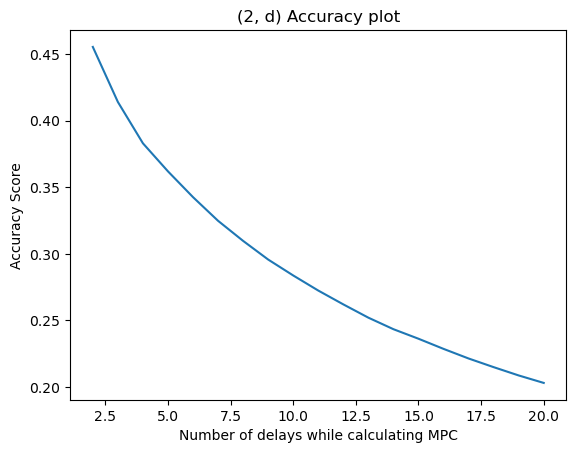

In [12]:
plot(2)

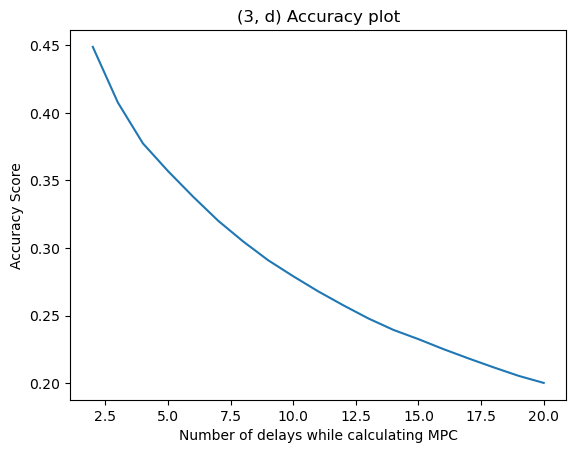

In [13]:
plot(3)

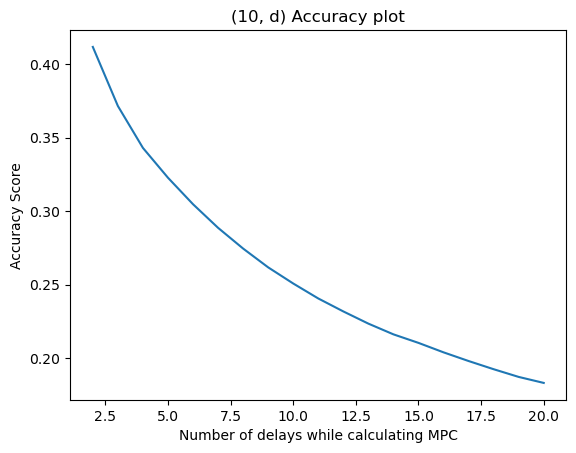

In [14]:
plot(10)

While keeping the number of lags constant we see that model accuracy decreases as the number of delays increase. And this effect is consistent at all lags.

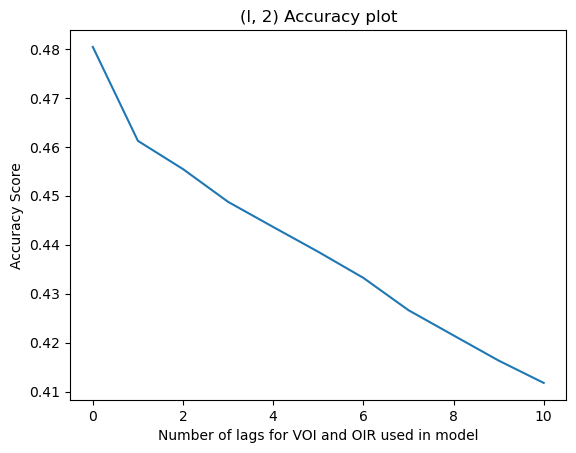

In [15]:
plott(2)

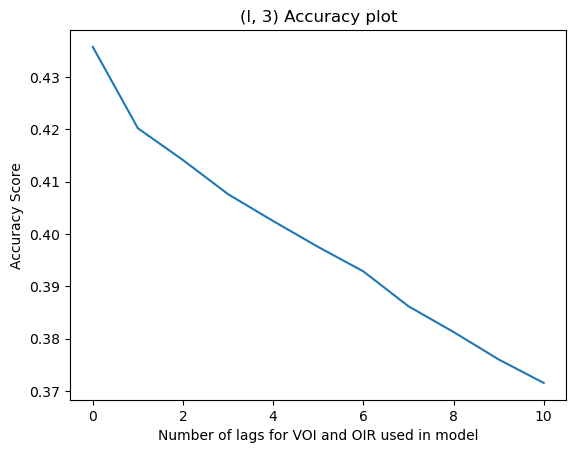

In [16]:
plott(3)

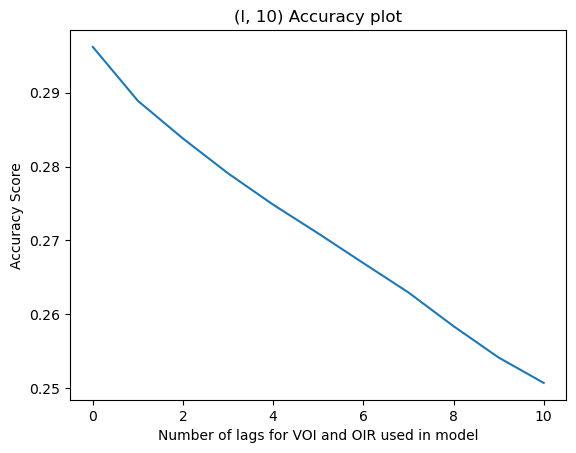

In [17]:
plott(10)

We see that accuracy decrease with an increase in the number of lags while keeping the delays constant. Therefore, the least lag and delay possible should be the most accurate.

This is why we will choose l=0 and d=2. Since the MPC is calculated using the midprice of future d prices, the minimum I have chose to go with is d=2.

### Optimising for threshold while trading on actual MPC

In [3]:
# Create an empty dictionary to store the results
#results_dict = {}

l, d = 0, 2
data1 = linear_data(df1, df2, l=l, d=d)
data2 = linear_data(df3, df4, l=l, d=d)
data3 = linear_data(df5, df6, l=l, d=d)
data4 = linear_data(df7, df8, l=l, d=d)
data5 = linear_data(df9, df10, l=l, d=d)
data6 = linear_data(df11, df12, l=l, d=d)
data7 = linear_data(df13, df14, l=l, d=d)
data8 = linear_data(df15, df16, l=l, d=d)
data9 = linear_data(df17, df18, l=l, d=d)
data10 = linear_data(df19, df20, l=l, d=d)
data11 = linear_data(df21, df22, l=l, d=d)
data12 = linear_data(df23, df24, l=l, d=d)
data13 = linear_data(df25, df26, l=l, d=d)

In [4]:
frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13]

result = pd.concat(frames)
train, test = np.split(result, [int(0.8*len(result))])

validate_model(train, test, l=l, threshold=0.41, optimise=True)

0.4804096400445306

In [5]:
test

,Price,MidPrice,Spread,MPC,MPB,OIR_(t),VOI_(t)
Time,,,,,,,
19469 days 21:30:33.840000,27594.7,27594.75,0.10,0.600,-0.050000,-0.425567,0.450
19469 days 21:30:34.090000,27594.7,27594.75,0.10,0.600,-0.050000,-0.422603,0.043
19469 days 21:30:34.590000,27594.7,27594.75,0.10,0.000,-0.650000,-0.427193,-8.587
19469 days 21:30:34.840000,27594.7,27594.75,0.10,0.000,-0.050000,-0.423680,0.049
19469 days 21:30:35.090000,27594.7,27594.75,0.10,0.000,-0.050000,-0.424445,-0.015
...,...,...,...,...,...,...,...
19471 days 16:25:17.599000,27326.7,27326.70,0.01,1.525,9.718473,-1.000000,0.000
19471 days 16:25:17.849000,27326.6,27326.65,0.10,1.550,-16.809177,0.685032,0.120
19471 days 16:25:18.099000,27326.6,27329.80,100.00,-1.400,-18.359177,-1.000000,-3.380


Model with $(l, d)$ = $(0, 2)$ is the most accurate. Now let's test for the optimal threshold.

I have used the real MPC in `test_data` to trade, signifying the ideal condition of having a fully accurate model. This will give us a better feel for the upper bounds of what the strategy can produce.

#### Threshold between 0.1 and 0.99

Let's look at profits before costs

In [11]:
profits_dict = {}
for threshold in [x/100 for x in range(1,100)]:
    df = backtest_strategy(train, test, threshold=threshold, l=0, to_test='Real', optimise=True)
    profits_dict[threshold] = sum(df["Trade Cost"])

In [16]:
max(zip(profits_dict.values(), profits_dict.keys()))

(39044.79999999926, 0.45)

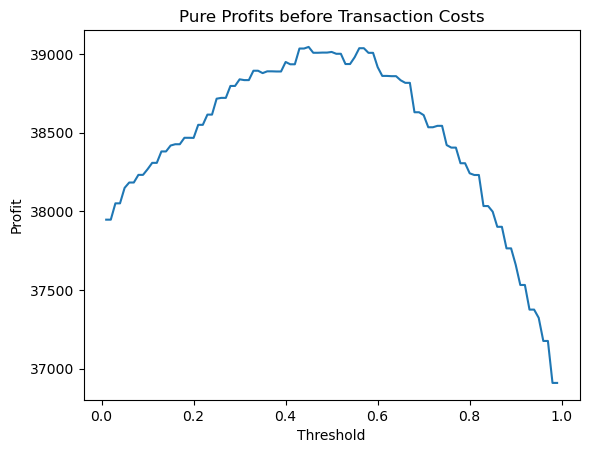

In [17]:
plt.plot(profits_dict.keys(), profits_dict.values())
plt.title('Pure Profits before Transaction Costs')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.show()

Given my previous findings of the optimal threshold of 4.1 and 4.4, this data seems to agree that the strategy is most profitable around 4.5 with an error of about 0.5.

In [24]:
Profits_dict = {}
for threshold in [x for x in range(1,1300)]:
    df = backtest_strategy(train, test, threshold=threshold, l=0, to_test='Real', optimise=True)
    Profits_dict[threshold] = (df.iloc[-1,6], df.iloc[-1,3])

In [34]:
for threshold in [x for x in range(1300,1500)]:
    df = backtest_strategy(train, test, threshold=threshold, l=0, to_test='Real', optimise=True)
    Profits_dict[threshold] = (df.iloc[-1,6], df.iloc[-1,3])

In [38]:
profits = [value[0] for value in Profits_dict.values()]
volume = [value[1] for value in Profits_dict.values()]

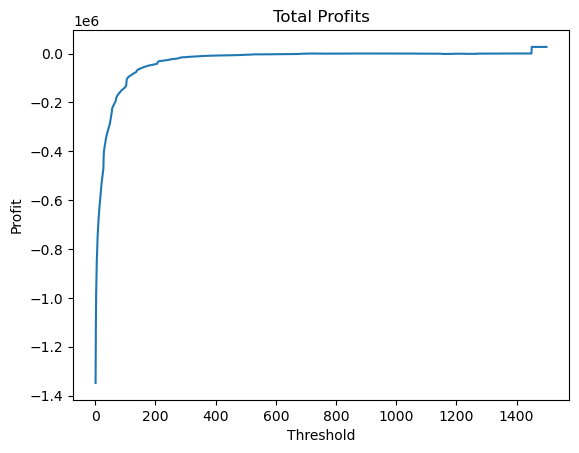

In [39]:
plt.plot(Profits_dict.keys(), profits)
plt.title('Total Profits')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.show()

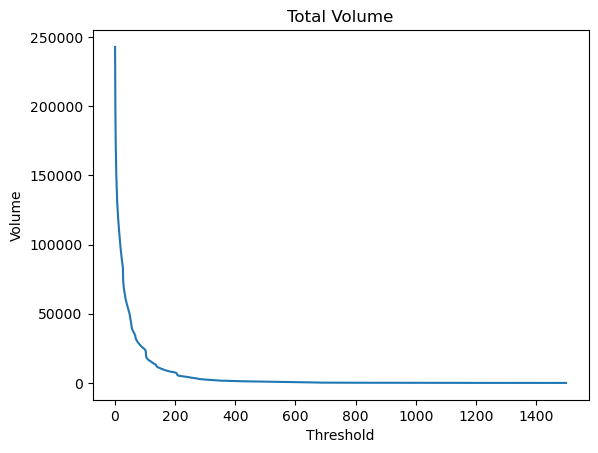

In [43]:
plt.plot(Profits_dict.keys(), volume)
plt.title('Total Volume')
plt.xlabel('Threshold')
plt.ylabel('Volume')
plt.show()

We see the profits follow an inverse function with slow progress towards the positive. This is of course because increasingly the threshold limits the number of trades possible.

In [51]:
positive = [i for i,j in enumerate(profits) if j>0]
positive[0]+1

705

In [56]:
Profits_dict[706]

(162.30953809997595, 166)

`Threshold = 706` is when it first becomes positive with a total profit of 162 and trade volume of 166.

In [57]:
positivep = [Profits_dict[i][0] for i in range(700, 1500)]
volumep = [Profits_dict[i][1] for i in range(700, 1500)]

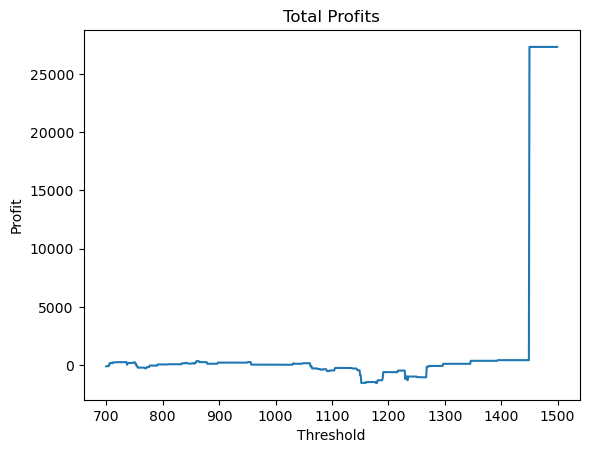

In [58]:
plt.plot([i for i in range(700, 1500)], positivep)
plt.title('Total Profits')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.show()

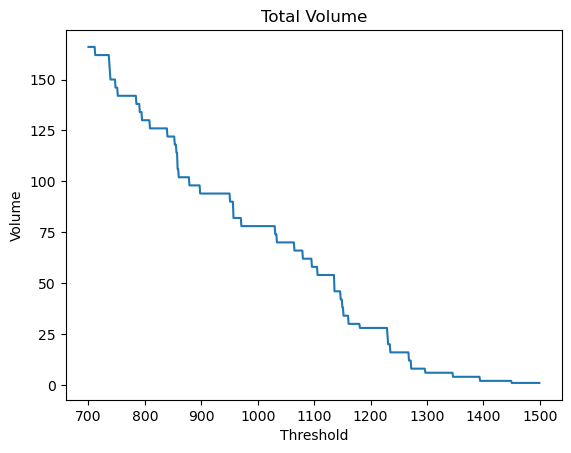

In [64]:
plt.plot([i for i in range(700, 1500)], volumep)
plt.title('Total Volume')
plt.xlabel('Threshold')
plt.ylabel('Volume')
plt.show()

We see the threshold 700 to 1400 produce just about the same profit. The jump as seen at around 1450 is because there are no MPC greator (smaller) thanpositive (negative) threshold. And since the last row of `test_data` is added into the bcktest data to signify 'end of day', that's what the strategy opens on and then never closes. The opening trade is a short hence there's positive 'profit'.

In [61]:
df = backtest_strategy(train, test, threshold=1480, l=0, to_test='Real', optimise=True)
df

,Price,Position,Trade Cost,Volume,Profit Before TC,Transaction Cost,Total Profit
Time,,,,,,,
19471 days 16:25:18.599000,27326.7,-1,27326.7,1,27326.7,5.656627,27321.043373


In [65]:
test

,Price,MidPrice,Spread,MPC,MPB,OIR_(t),VOI_(t)
Time,,,,,,,
19469 days 21:30:33.840000,27594.7,27594.75,0.10,0.600,-0.050000,-0.425567,0.450
19469 days 21:30:34.090000,27594.7,27594.75,0.10,0.600,-0.050000,-0.422603,0.043
19469 days 21:30:34.590000,27594.7,27594.75,0.10,0.000,-0.650000,-0.427193,-8.587
19469 days 21:30:34.840000,27594.7,27594.75,0.10,0.000,-0.050000,-0.423680,0.049
19469 days 21:30:35.090000,27594.7,27594.75,0.10,0.000,-0.050000,-0.424445,-0.015
...,...,...,...,...,...,...,...
19471 days 16:25:17.599000,27326.7,27326.70,0.01,1.525,9.718473,-1.000000,0.000
19471 days 16:25:17.849000,27326.6,27326.65,0.10,1.550,-16.809177,0.685032,0.120
19471 days 16:25:18.099000,27326.6,27329.80,100.00,-1.400,-18.359177,-1.000000,-3.380


Keep in mind that this is about two days worth of data. I don't think this strategy can yield a positive profit in a day for BTCUSDT. In this case, the strategy transforms into MFT.